In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.fcm import fcm

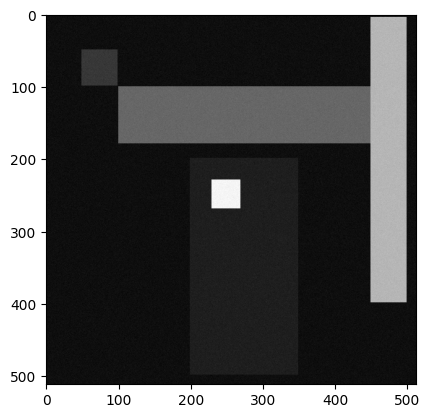

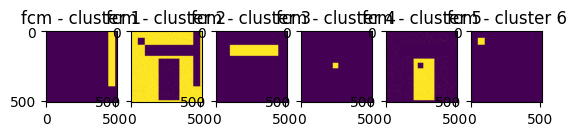

In [4]:
image = np.zeros((512,512), dtype = np.float32)
image[:,:] = 20
image[49:99,49:99] = 150
image[100:179,100:449] = 300
image[199:499,199:349] = 70
image[229:269,229:269] = 750
image[4:399,449:499] = 550

sigma = 10

imageN = image + sigma*np.random.randn(512, 512)

fig, ax = plt.subplots()
ax.imshow(imageN, cmap = "gray")

imageN = imageN.reshape((-1,1))
# initialize centers
# initial_centers = kmeans_plusplus_initializer(imageN, 6, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
initial_centers = kmeans_plusplus_initializer(imageN, 6, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

# create instance of Fuzzy C-Means algotirhm
fcm_instance = fcm(imageN, initial_centers)

# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

mask1 = np.zeros_like(imageN)
mask1[clusters[0]]=1
mask1 = mask1.reshape(image.shape)
mask2 = np.zeros_like(imageN)
mask2[clusters[1]]=1
mask2 = mask2.reshape(image.shape)
mask3 = np.zeros_like(imageN)
mask3[clusters[2]]=1
mask3 = mask3.reshape(image.shape)
mask4 = np.zeros_like(imageN)
mask4[clusters[3]]=1
mask4 = mask4.reshape(image.shape)
mask5 = np.zeros_like(imageN)
mask5[clusters[4]]=1
mask5 = mask5.reshape(image.shape)
mask6 = np.zeros_like(imageN)
mask6[clusters[5]]=1
mask6 = mask6.reshape(image.shape)
fig, ax = plt.subplots(1,6)
ax[0].imshow(mask1)
ax[1].imshow(mask2)
ax[2].imshow(mask3)
ax[3].imshow(mask4)
ax[4].imshow(mask5)
ax[5].imshow(mask6)
ax[0].set_title('fcm - cluster 1')
ax[1].set_title('fcm - cluster 2')
ax[2].set_title('fcm - cluster 3')
ax[3].set_title('fcm - cluster 4')
ax[4].set_title('fcm - cluster 5')
ax[5].set_title('fcm - cluster 6')
plt.show()



